In [1]:
# all package imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import catboost
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
matchlog=pd.read_csv('atlutd_datascientist_project1_matchlog.csv')
schedule=pd.read_csv('atlutd_datascientist_project1_schedule.csv')

In [3]:
schedule.head()

,Unnamed: 0,match_id,season_id,match_date,match_week,competition_stage_id,home_team_id,away_team_id,home_score,away_score,match_status
0,1,3787383,91,2021-04-17,1,1,591,575,4.0,2.0,available
1,2,3787384,91,2021-04-17,1,1,643,614,2.0,1.0,available
2,3,3787387,91,2021-04-17,1,1,488,612,4.0,0.0,available
3,4,3787385,91,2021-04-17,1,1,599,365,0.0,0.0,available
4,5,3787394,91,2021-04-18,1,1,918,414,2.0,1.0,available


In [4]:
matchlog.head()

,Unnamed: 0,match_id,player_id,competition_id,season_id,team_id,player_name,team_name,player_match_minutes,player_match_np_xg,...,player_match_passes,player_match_successful_passes,player_match_forward_passes,player_match_op_f3_passes,player_match_obv,player_match_np_psxg,player_match_pressures,player_match_defensive_actions,season_name,birth_date
0,1,2306311,5646,44,43,1938,Aníbal Godoy,Nashville SC,95.35,0.11,...,75,70,12,28,0.19,0.06,10.0,12,2020.0,1990-02-10
1,2,2306311,12524,44,43,1938,Walker Zimmerman,Nashville SC,95.35,0.12,...,56,46,10,9,-0.01,0.00,9.0,13,2020.0,1993-05-19
2,3,2306311,12525,44,43,1938,Dave Romney,Nashville SC,95.35,0.00,...,40,35,10,6,0.02,0.00,3.0,3,2020.0,1993-06-12
3,4,2306311,12570,44,43,1938,Dominique Badji,Nashville SC,71.32,0.00,...,13,13,0,8,0.01,0.00,9.0,10,2020.0,1992-10-16
4,5,2306311,12575,44,43,1938,Joe Willis,Nashville SC,95.35,0.00,...,18,12,10,0,-0.04,0.00,NaN,0,2020.0,1988-08-10


In [5]:
matchlog.columns

Index(['Unnamed: 0', 'match_id', 'player_id', 'competition_id', 'season_id',
       'team_id', 'player_name', 'team_name', 'player_match_minutes',
       'player_match_np_xg', 'player_match_np_shots', 'player_match_op_shots',
       'player_match_goals', 'player_match_np_goals', 'player_match_xa',
       'player_match_op_xa', 'player_match_sp_xa', 'player_match_key_passes',
       'player_match_op_key_passes', 'player_match_assists',
       'player_match_op_assists', 'player_match_op_passes_into_box',
       'player_match_passes_into_box', 'player_match_touches_inside_box',
       'player_match_dribbles', 'player_match_passes',
       'player_match_successful_passes', 'player_match_forward_passes',
       'player_match_op_f3_passes', 'player_match_obv', 'player_match_np_psxg',
       'player_match_pressures', 'player_match_defensive_actions',
       'season_name', 'birth_date'],
      dtype='object')

### EDA
##### checking for missing values, plotting different attributes, etc

In [6]:
#checking what percentage of matchlog has a missing value
len(np.where(matchlog.isna())[0])/matchlog.shape[0]

0.09085744374237889

In [7]:
#checking what percentage of schedule has a missing value
len(np.where(schedule.isna())[0])/schedule.shape[0]

0.36623067776456597

In [8]:
schedule[schedule['match_date'].isin(['2025-03-22', '2025-03-23'])]

,Unnamed: 0,match_id,season_id,match_date,match_week,competition_stage_id,home_team_id,away_team_id,home_score,away_score,match_status
2073,2074,3981200,315,2025-03-22,5,1,489,365,NaN,NaN,scheduled
2074,2075,3981199,315,2025-03-22,5,1,612,442,NaN,NaN,scheduled
2075,2076,3981212,315,2025-03-23,5,1,5104,29405,NaN,NaN,scheduled
2076,2077,3981211,315,2025-03-23,5,1,488,643,NaN,NaN,scheduled
2077,2078,3981210,315,2025-03-23,5,1,433,413,NaN,NaN,scheduled
2078,2079,3981209,315,2025-03-23,5,1,600,647,NaN,NaN,scheduled
2079,2080,3981208,315,2025-03-23,5,1,1938,591,NaN,NaN,scheduled
2080,2081,3981207,315,2025-03-23,5,1,637,919,NaN,NaN,scheduled
2081,2082,3981206,315,2025-03-23,5,1,496,14862,NaN,NaN,scheduled
2082,2083,3981205,315,2025-03-23,5,1,599,918,NaN,NaN,scheduled


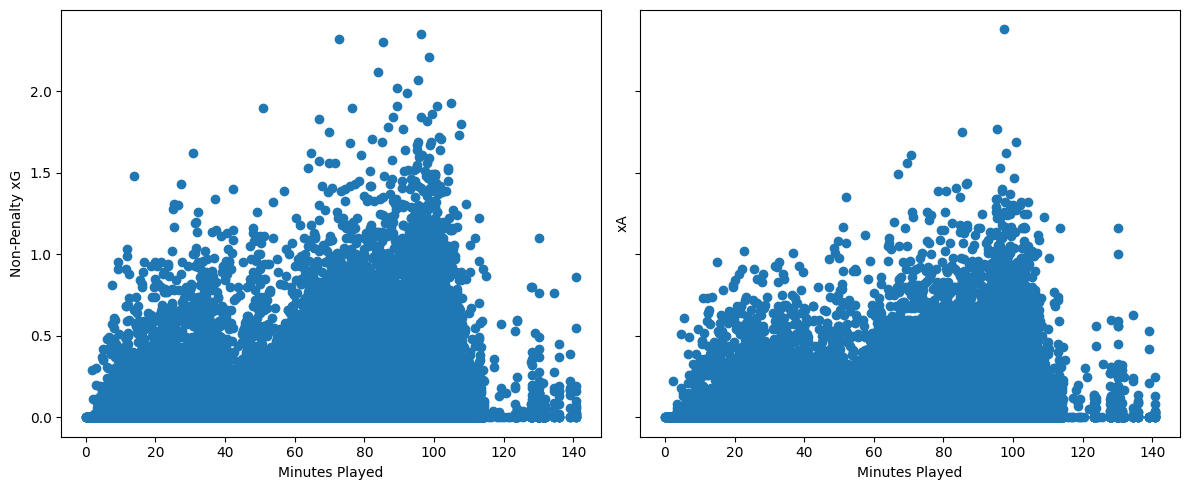

In [9]:
#plotting non-penalty xG and xA against features that might matter (minutes played in this example)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axes[0].scatter(matchlog.player_match_minutes, matchlog.player_match_np_xg)
axes[0].set_xlabel("Minutes Played")
axes[0].set_ylabel("Non-Penalty xG")

axes[1].scatter(matchlog.player_match_minutes, matchlog.player_match_xa)
axes[1].set_xlabel("Minutes Played")
axes[1].set_ylabel("xA")

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Non-penalty xG + xA')

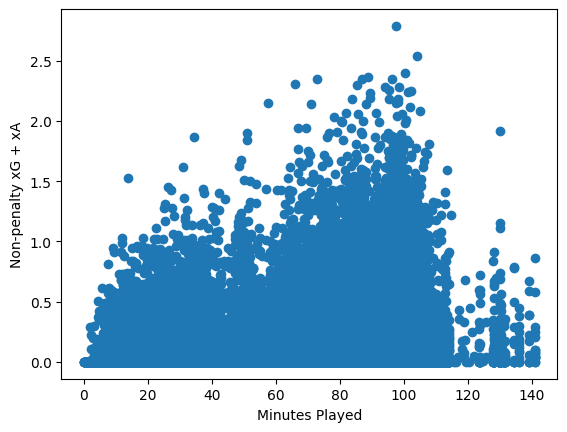

In [10]:
#plotting non-penalty xG + xA against features that might matter (minutes played in this example)
plt.scatter(matchlog.player_match_minutes, matchlog.player_match_xa+matchlog.player_match_np_xg)
plt.xlabel('Minutes Played')
plt.ylabel('Non-penalty xG + xA')


Text(0, 0.5, 'Non-Penalty xG')

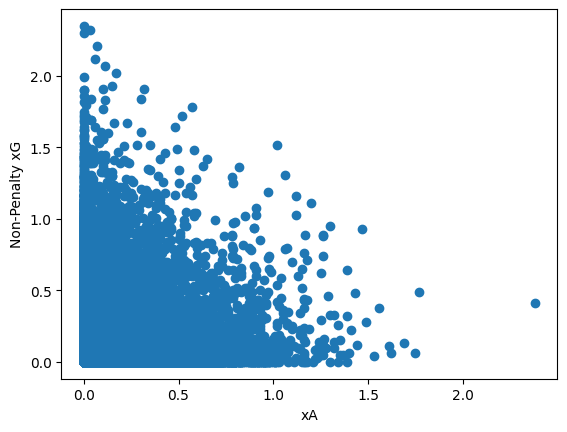

In [11]:
plt.scatter(matchlog.player_match_xa,matchlog.player_match_np_xg)
plt.xlabel('xA')
plt.ylabel('Non-Penalty xG')

### Feature Engineering and Selection

In [12]:
matchlog = matchlog.merge(schedule[['match_id', 'match_date', 'home_team_id']], on='match_id', how='left')
matchlog['xTotal'] = matchlog['player_match_xa'] + matchlog['player_match_np_xg']
matchlog.sort_values(by='match_date',inplace=True)
matchlog.dropna(inplace=True)

In [13]:
cols_to_shift = [
    'player_match_minutes', 'player_match_np_xg', 'player_match_np_shots',
    'player_match_op_shots', 'player_match_goals', 'player_match_np_goals', 
    'player_match_xa', 'player_match_op_xa', 'player_match_sp_xa', 
    'player_match_key_passes', 'player_match_op_key_passes', 'player_match_assists',
    'player_match_op_assists', 'player_match_op_passes_into_box', 
    'player_match_passes_into_box', 'player_match_touches_inside_box', 
    'player_match_dribbles', 'player_match_passes', 'player_match_successful_passes',
    'player_match_forward_passes', 'player_match_op_f3_passes', 'player_match_obv', 
    'player_match_np_psxg', 'player_match_pressures', 'player_match_defensive_actions', 
    'xTotal'
]

# Sort by player_id and match_date to ensure correct ordering
matchlog = matchlog.sort_values(by=['player_id', 'match_date'])

# Shift each column within the player_id group
for col in cols_to_shift:
    matchlog[f'prev_game_{col}'] = matchlog.groupby('player_id')[col].shift(1)
    matchlog[f'prev_game_{col}'] = matchlog[f'prev_game_{col}'].fillna(np.median(matchlog[f'prev_game_{col}']))

#rolling 5 game average
for col in cols_to_shift:
    ave_col=np.mean(matchlog[col])
    matchlog[f'rolling_5_avg_{col}'] = (
        matchlog.groupby('player_id')[col]
        .transform(lambda x: x.shift().rolling(window=5, min_periods=1).mean())
    )

    matchlog[f'rolling_5_avg_{col}'] = matchlog.groupby('player_id')[f'rolling_5_avg_{col}'].transform(lambda x: x.fillna(x.mean()))

#Days rested
# Get previous match_date for each player
matchlog['match_date'] = pd.to_datetime(matchlog['match_date'])  # Convert to datetime if needed
matchlog['prev_match_date'] = matchlog.groupby('player_id')['match_date'].shift(1)

# Compute days rested
matchlog['days_rested'] = (matchlog['match_date'] - matchlog['prev_match_date']).dt.days

# Fill NaN (first match for each player) with a default value, e.g., 7 days
matchlog['days_rested'] = matchlog['days_rested'].fillna(100)

# Drop prev_match_date if not needed
matchlog = matchlog.drop(columns=['prev_match_date'])



#Is home
matchlog['is_home'] = (matchlog['team_id'] == matchlog['home_team_id']).astype(int)
matchlog.dropna(inplace=True)


In [14]:
# Initialize scaler
scaler = StandardScaler()


X = matchlog[[f'prev_game_{col}' for col in cols_to_shift] + ['is_home', 'days_rested','player_id'] + [f'rolling_5_avg_{col}' for col in cols_to_shift]]
y = matchlog['xTotal']

cat_features = ['is_home','player_id']

X_train, X_test, y_train_prescale, y_test_prescale = train_test_split(X, y, test_size=0.15, random_state=42)

y_train = scaler.fit_transform(y_train_prescale.values.reshape(-1, 1))
y_test = scaler.transform(y_test_prescale.values.reshape(-1, 1))


In [15]:
# train the model with all inputs and use the internal feature importance tool to select inputs
cat_model = catboost.CatBoostRegressor(iterations=1000, depth=5, cat_features=cat_features,verbose=0)
cat_model.fit(X_train, y_train)

importances = cat_model.get_feature_importance()
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importance_df.sort_values(by='importance', ascending=False))

                                          feature  importance
28                                      player_id   13.064405
54                           rolling_5_avg_xTotal    8.159442
44  rolling_5_avg_player_match_touches_inside_box    5.993687
32            rolling_5_avg_player_match_op_shots    4.279336
26                                        is_home    3.485254
51             rolling_5_avg_player_match_np_psxg    3.337434
30               rolling_5_avg_player_match_np_xg    2.934651
29             rolling_5_avg_player_match_minutes    2.854263
31            rolling_5_avg_player_match_np_shots    2.656441
21                     prev_game_player_match_obv    2.537804
0                  prev_game_player_match_minutes    2.534890
27                                    days_rested    2.424176
22                 prev_game_player_match_np_psxg    2.396147
47   rolling_5_avg_player_match_successful_passes    2.378490
36               rolling_5_avg_player_match_op_xa    2.132475
50      

In [16]:
# select features with calculated importance > a selected threshold
feature_threshold = 2
selected_features = feature_importance_df[feature_importance_df['importance'] > feature_threshold]['feature'].tolist()
selected_cat_features = list(set(selected_features) & set(cat_features))

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

### Model Training + Validation

In [17]:
# train a new catboost model using the selected features only
cat_model_selected = catboost.CatBoostRegressor(iterations=1000, depth=5, cat_features=selected_cat_features, logging_level='Verbose')
cat_model_selected.fit(X_train_selected, y_train)#_scaled.ravel())

# Evaluate the model on the test set
y_pred = cat_model_selected.predict(X_test_selected)*2
y_pred_unscale = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

Learning rate set to 0.075277
0:	learn: 0.9862175	total: 33ms	remaining: 33s
1:	learn: 0.9747298	total: 53.7ms	remaining: 26.8s
2:	learn: 0.9642333	total: 79.7ms	remaining: 26.5s
3:	learn: 0.9550218	total: 103ms	remaining: 25.6s
4:	learn: 0.9471584	total: 130ms	remaining: 25.9s
5:	learn: 0.9397898	total: 160ms	remaining: 26.5s
6:	learn: 0.9336292	total: 185ms	remaining: 26.2s
7:	learn: 0.9281786	total: 217ms	remaining: 26.9s
8:	learn: 0.9231548	total: 251ms	remaining: 27.6s
9:	learn: 0.9186808	total: 290ms	remaining: 28.7s
10:	learn: 0.9148744	total: 311ms	remaining: 28s
11:	learn: 0.9114278	total: 334ms	remaining: 27.5s
12:	learn: 0.9073235	total: 361ms	remaining: 27.4s
13:	learn: 0.9032844	total: 376ms	remaining: 26.5s
14:	learn: 0.8997241	total: 392ms	remaining: 25.8s
15:	learn: 0.8966368	total: 409ms	remaining: 25.2s
16:	learn: 0.8939545	total: 429ms	remaining: 24.8s
17:	learn: 0.8914316	total: 450ms	remaining: 24.6s
18:	learn: 0.8893393	total: 484ms	remaining: 25s
19:	learn: 0.887

In [18]:
#R2
r2 = r2_score(y_test, y_pred)
print(f"R2 Value (Scaled): {r2:.4f}")

r2 = r2_score(y_test_prescale, y_pred_unscale)
print(f"R2 Value (Not Scaled): {r2:.4f}")
print('')

#RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Scaled): {rmse:.4f}")

rmse = np.sqrt(mean_squared_error(y_test_prescale, y_pred_unscale))
print(f"RMSE (Not Scaled): {rmse:.4f}")

R2 Value (Scaled): -0.0761
R2 Value (Not Scaled): -0.0761

RMSE (Scaled): 1.0527
RMSE (Not Scaled): 0.2579


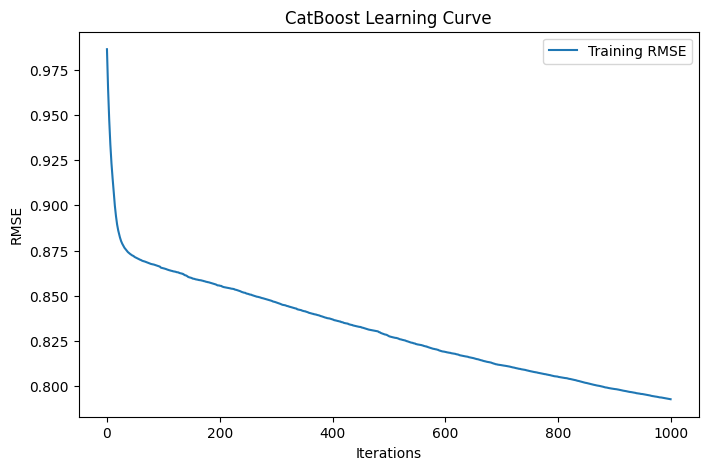

In [19]:
#plotting the learning curve
train_loss = cat_model_selected.get_evals_result()['learn']['RMSE']

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Training RMSE')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.legend()
plt.title('CatBoost Learning Curve')
plt.show()

Text(0, 0.5, 'Model Predicted Values')

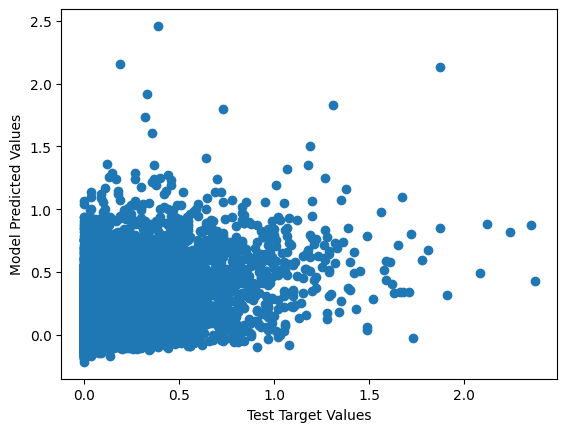

In [20]:
plt.plot(y_test_prescale,y_pred_unscale,'o')
plt.xlabel('Test Target Values')
plt.ylabel('Model Predicted Values')

### Predicting Next Week's xG+xA

In [21]:
# Define last week's match dates
last_week_dates = ['2025-03-15', '2025-03-16']
next_week_dates = ['2025-03-22', '2025-03-23']

# Filter last week's data
last_week = matchlog[matchlog['match_date'].isin(last_week_dates)].copy()

# Keep only selected features
this_week = last_week[selected_features].copy()

# Assign next week's match dates (alternating for simplicity)
this_week['match_date'] = this_week.index.map(lambda i: next_week_dates[i % 2])

# Convert match_date to datetime
this_week['match_date'] = pd.to_datetime(this_week['match_date'])

# Compute new 'days_rested' as difference from last week's match
last_week_dates_map = last_week.set_index('player_id')['match_date']
this_week['days_rested'] = (this_week['match_date'] - this_week['player_id'].map(last_week_dates_map)).dt.days

# Ensure 'is_home' is properly assigned (if home/away info is available)
# If we assume the home/away teams stay the same:
this_week['is_home'] = last_week['is_home']

# Reset index
this_week.reset_index(drop=True, inplace=True)


matchlog_unique_ids = matchlog.drop_duplicates(subset='player_id', keep='first')
# Map player names to this_week using the unique matchlog dataframe
this_week['player_name'] = this_week['player_id'].map(matchlog_unique_ids.set_index('player_id')['player_name'])


/var/folders/fz/q693s9nn37b4lb3bfg3ws1kh0000gn/T/ipykernel_34736/1922839843.py:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  last_week = matchlog[matchlog['match_date'].isin(last_week_dates)].copy()


In [22]:
this_week

,prev_game_player_match_minutes,prev_game_player_match_obv,prev_game_player_match_np_psxg,is_home,days_rested,player_id,rolling_5_avg_player_match_minutes,rolling_5_avg_player_match_np_xg,rolling_5_avg_player_match_np_shots,rolling_5_avg_player_match_op_shots,rolling_5_avg_player_match_op_xa,rolling_5_avg_player_match_touches_inside_box,rolling_5_avg_player_match_successful_passes,rolling_5_avg_player_match_np_psxg,rolling_5_avg_xTotal,match_date,player_name
0,95.17,-0.10,0.00,1,6,3005,96.224000,0.278000,2.400000,1.600000,0.018000,5.800000,13.400000,0.158,0.296000,2025-03-22,Ezequiel Ponce
1,104.53,0.07,0.00,0,7,3139,93.366000,0.046000,0.200000,0.000000,0.000000,0.600000,34.800000,0.000,0.046000,2025-03-23,Chidozie Awaziem
2,83.47,0.30,0.79,1,6,3380,96.430000,0.448000,3.800000,3.400000,0.090000,11.200000,14.800000,0.572,0.538000,2025-03-22,Christian Benteke
3,95.03,0.18,0.00,1,8,3499,96.666667,0.173333,1.666667,1.666667,0.050000,4.333333,20.666667,0.040,0.226667,2025-03-23,Eric Maxim Choupo-Moting
4,100.20,0.19,0.00,1,6,3507,98.940000,0.060000,0.500000,0.500000,0.160000,2.500000,40.000000,0.375,0.220000,2025-03-22,Wilfried Zaha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,96.28,0.70,0.72,0,7,428783,69.848000,0.060000,0.200000,0.000000,0.062000,1.200000,15.200000,0.144,0.122000,2025-03-23,Morris Duggan
326,81.10,-0.01,0.00,1,7,429021,70.883333,0.170000,0.666667,0.333333,0.056667,2.333333,33.666667,0.110,0.226667,2025-03-23,Beau Leroux
327,36.48,0.17,0.00,1,7,462156,36.480000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000,0.000000,2025-03-23,Nico Cavallo
328,25.42,0.05,0.00,0,8,463884,25.420000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000,0.000000,2025-03-23,Joran Gerbet


In [ ]:
# predicting upcoming xTotal based off selected features leading up to the upcoming week
X_this_week = this_week[selected_features]
this_week['predicted_xTotal'] = cat_model_selected.predict(this_week[selected_features]) 
this_week['predicted_xTotal'] = scaler.inverse_transform(this_week['predicted_xTotal'].values.reshape(-1, 1)).flatten()

In [24]:
this_week.sort_values(by='predicted_xTotal',ascending=False)[['player_name','predicted_xTotal']].head(10)

,player_name,predicted_xTotal
158,Hugo Cuypers,0.826296
104,Anders Dreyer,0.760788
294,Leonardo Barroso,0.635525
48,Josef Martínez,0.628218
228,Adrian Alonso Martínez Batista,0.592805
157,Kelvin Kwarteng Yeboah,0.570046
2,Christian Benteke,0.562120
28,Cristian Arango,0.545076
17,Denis Bouanga,0.531605
137,Petar Musa,0.456182
